In [34]:
#import libraries
import re
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
import string
import nltk
import warnings 
warnings.filterwarnings("ignore", category=DeprecationWarning)

%matplotlib inline

In [35]:
#set the directory
import os
os.chdir(r"C:\Users\ASUS\Desktop\Recruitment task\fintech")

In [36]:
#read the data
train  = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [37]:
#info of train data
train.shape

(7920, 3)

In [38]:
#info of test data
test.shape

(1953, 2)

In [39]:
#description of train data
train.head(15)

,id,label,tweet
0,1,0,#fingerprint #Pregnancy Test https://goo.gl/h1...
1,2,0,Finally a transparant silicon case ^^ Thanks t...
2,3,0,We love this! Would you go? #talk #makememorie...
3,4,0,I'm wired I know I'm George I was made that wa...
4,5,1,What amazing service! Apple won't even talk to...
5,6,1,iPhone software update fucked up my phone big ...
6,7,0,Happy for us .. #instapic #instadaily #us #son...
7,8,0,New Type C charger cable #UK http://www.ebay.c...
8,9,0,Bout to go shopping again listening to music #...
9,10,0,Photo: #fun #selfie #pool #water #sony #camera...


In [40]:
data = train.append(test, ignore_index=True) 


C:\Users\ASUS\Anaconda3\lib\site-packages\pandas\core\frame.py:6692: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  sort=sort)


In [41]:
def remove_pattern(input_txt, pattern):
    r = re.findall(pattern, input_txt)
    for i in r:
        input_txt = re.sub(i, '', input_txt)
        
    return input_txt   

In [42]:
#lower string
data['tweet'] = data['tweet'].str.lower()

In [43]:
# remove handles 
data['tweet'] = np.vectorize(remove_pattern)(data['tweet'], "@[\w]*")

In [44]:
# remove special characters, numbers, punctuations
data['tweet'] = data['tweet'].str.replace("[^a-zA-Z#]", " ")


In [45]:
data['tweet'] = data['tweet'].apply(lambda x: ' '.join([w for w in x.split() if len(w)>3]))

In [46]:
data.head(15)


,id,label,tweet
0,1,0.0,#fingerprint #pregnancy test https mfqv #andro...
1,2,0.0,finally transparant silicon case thanks uncle ...
2,3,0.0,love this would #talk #makememories #unplug #r...
3,4,0.0,wired know george made that #iphone #cute #dav...
4,5,1.0,what amazing service apple even talk about que...
5,6,1.0,iphone software update fucked phone time stupi...
6,7,0.0,happy #instapic #instadaily #sony #xperia #xpe...
7,8,0.0,type charger cable http ebay #bay #amazon #ets...
8,9,0.0,bout shopping again listening music #iphone #j...
9,10,0.0,photo #fun #selfie #pool #water #sony #camera ...


As i read some of the tweets i came to conclusion that label 0 is for positve tweets and 1 is for negative tweets
anyways first we will  preprocess the data

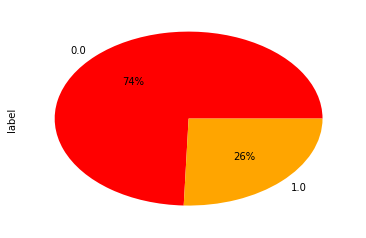

In [47]:
#visualization of data 0's and 1's.
data.label.value_counts().plot(kind='pie',autopct='%1.0f%%',colors=['red','orange'])

In [48]:
#tokenization 
tokenized_tweet = data['tweet'].apply(lambda x: x.split())
tokenized_tweet.head()

0    [#fingerprint, #pregnancy, test, https, mfqv, ...
1    [finally, transparant, silicon, case, thanks, ...
2    [love, this, would, #talk, #makememories, #unp...
3    [wired, know, george, made, that, #iphone, #cu...
4    [what, amazing, service, apple, even, talk, ab...
Name: tweet, dtype: object

In [49]:
for i in range(len(tokenized_tweet)):
    tokenized_tweet[i] = ' '.join(tokenized_tweet[i])

data['tweet'] = tokenized_tweet

textblob offers a simple API to access its methods and perform basic NLP tasks.

In [50]:
from textblob import TextBlob
def analize_sentiment(tweet):
    '''
    Utility function to classify the polarity of a tweet
    using textblob.
    '''
    analysis = TextBlob(tweet)
    if analysis.sentiment.polarity > 0:
        return 1
    elif analysis.sentiment.polarity == 0:
        return 0
    else:
        return -1

In [51]:
data['sentiment'] = np.array([ analize_sentiment(tweet) for tweet in data['tweet'] ])

# We display the updated dataframe with the new column:
display(data.head(15))

,id,label,tweet,sentiment
0,1,0.0,#fingerprint #pregnancy test https mfqv #andro...,1
1,2,0.0,finally transparant silicon case thanks uncle ...,1
2,3,0.0,love this would #talk #makememories #unplug #r...,1
3,4,0.0,wired know george made that #iphone #cute #dav...,1
4,5,1.0,what amazing service apple even talk about que...,-1
5,6,1.0,iphone software update fucked phone time stupi...,-1
6,7,0.0,happy #instapic #instadaily #sony #xperia #xpe...,1
7,8,0.0,type charger cable http ebay #bay #amazon #ets...,1
8,9,0.0,bout shopping again listening music #iphone #j...,0
9,10,0.0,photo #fun #selfie #pool #water #sony #camera ...,1


In [52]:
pos_tweets = [ tweet for index, tweet in enumerate(data['tweet']) if data['sentiment'][index] > 0]
neu_tweets = [ tweet for index, tweet in enumerate(data['tweet']) if data['sentiment'][index] == 0]
neg_tweets = [ tweet for index, tweet in enumerate(data['tweet']) if data['sentiment'][index] < 0]

In [53]:
print("Percentage of positive tweets: {}%".format(len(pos_tweets)*100/len(data['tweet'])))
print("Percentage of neutral tweets: {}%".format(len(neu_tweets)*100/len(data['tweet'])))
print("Percentage de negative tweets: {}%".format(len(neg_tweets)*100/len(data['tweet'])))

Percentage of positive tweets: 49.59991897093082%
Percentage of neutral tweets: 33.56629190722172%
Percentage de negative tweets: 16.833789121847463%


By wordcloud we can create a cloud filled with lots of words in different sizes,
which represents the frequency or the importance of each word.

all_words from data

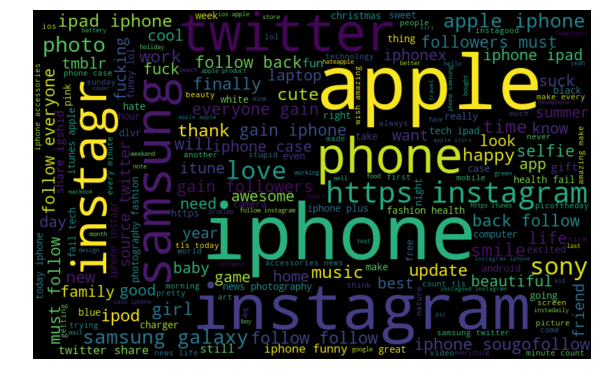

In [54]:
all_words = ' '.join([text for text in data['tweet']])
from wordcloud import WordCloud
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(all_words)

plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

 positive_words from data

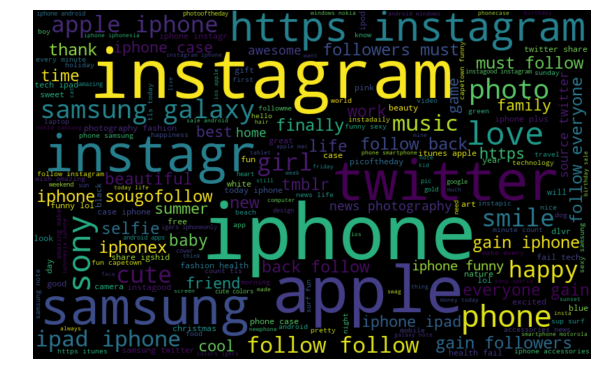

In [55]:
positive_words =' '.join([text for text in data['tweet'][data['label'] == 0]])

wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(positive_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

negative_words of data

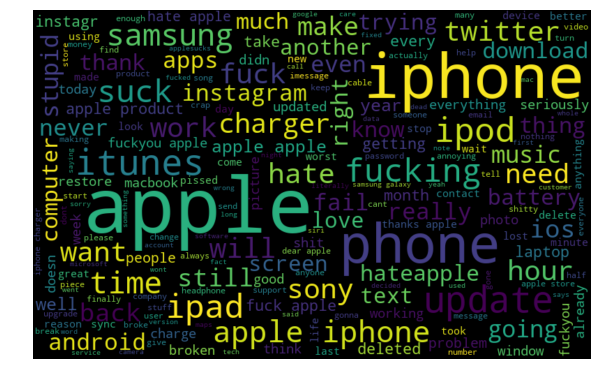

In [56]:
negative_words = ' '.join([text for text in data['tweet'][data['label'] == 1]])
wordcloud = WordCloud(width=800, height=500,
random_state=21, max_font_size=110).generate(negative_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

By seeing positive words and negative words apple and iphone company has equally having positivity and negitivity.
But intrestingly samsung having less negativity compared to apple may be due to insufficient data. 
sony is also having less negativity .

we can see some of the negative words like new ,battery,update,mac,computer etc..
by this we can say that battery problem or update etc..

In [57]:
# function to collect hashtags
def hashtag_extract(x):
    hashtags = []
    # Loop over the words in the tweet
    for i in x:
        ht = re.findall(r"#(\w+)", i)
        hashtags.append(ht)

    return hashtags

In [58]:
# extracting hashtags from data

HT_regular = hashtag_extract(data['tweet'][data['label'] == 0])


HT_negative = hashtag_extract(data['tweet'][data['label'] == 1])

# unnesting list
HT_regular = sum(HT_regular,[])
HT_negative = sum(HT_negative,[])

positive words bar plot

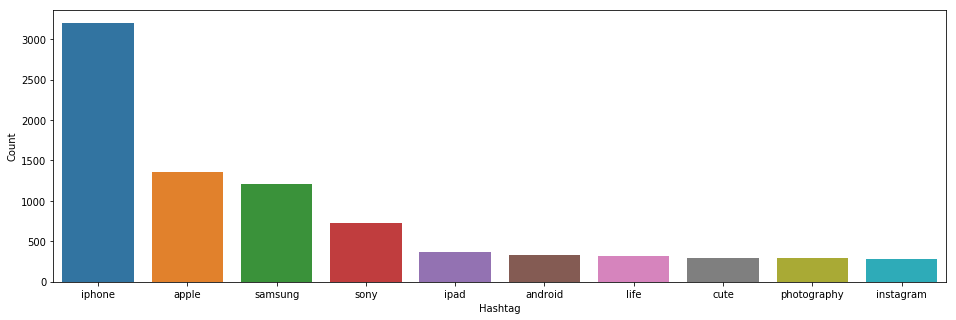

In [59]:
a = nltk.FreqDist(HT_regular)
d = pd.DataFrame({'Hashtag': list(a.keys()),
                  'Count': list(a.values())})
# selecting top 10 most frequent hashtags     
d = d.nlargest(columns="Count", n = 10) 
plt.figure(figsize=(16,5))
ax = sns.barplot(data=d, x= "Hashtag", y = "Count")
ax.set(ylabel = 'Count')
plt.show()

negative words bar plot

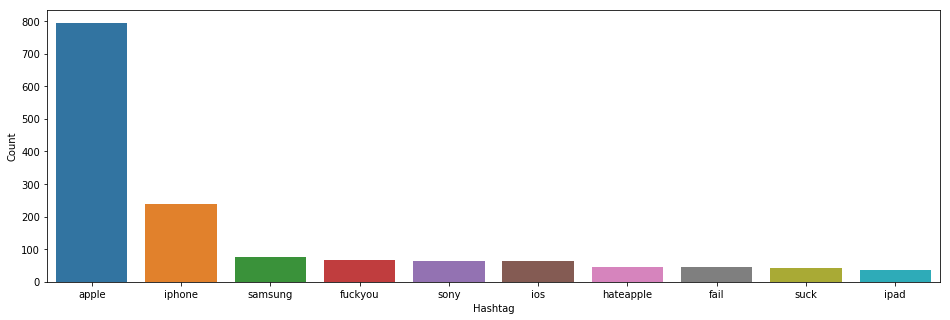

In [60]:
b = nltk.FreqDist(HT_negative)
e = pd.DataFrame({'Hashtag': list(b.keys()), 'Count': list(b.values())})
# selecting top 10 most frequent hashtags
e = e.nlargest(columns="Count", n = 10)   
plt.figure(figsize=(16,5))
ax = sns.barplot(data=e, x= "Hashtag", y = "Count")
ax.set(ylabel = 'Count')
plt.show()

In [28]:
from sklearn.feature_extraction.text import CountVectorizer
bow_vectorizer = CountVectorizer(max_df=0.90, min_df=2, max_features=1000, stop_words='english')
# bag-of-words feature matrix
bow = bow_vectorizer.fit_transform(data['tweet'])

In [29]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer(max_df=0.90, min_df=2, max_features=1000, stop_words='english')
# TF-IDF feature matrix
tfidf = tfidf_vectorizer.fit_transform(data['tweet'])

In [30]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score

train_bow = bow[:7920,:]
test_bow = bow[7920:,:]

# splitting data into training and validation set
xtrain_bow, xvalid_bow, ytrain, yvalid = train_test_split(train_bow, train['label'], random_state=42, test_size=0.3)

lreg = LogisticRegression()
lreg.fit(xtrain_bow, ytrain) # training the model

prediction = lreg.predict_proba(xvalid_bow) # predicting on the validation set
prediction_int = prediction[:,1] >= 0.3 # if prediction is greater than or equal to 0.3 than 1 else 0
prediction_int = prediction_int.astype(np.int)

f1_score(yvalid, prediction_int) # calculating f1 score

C:\Users\ASUS\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


0.7983367983367983

In [31]:
train_tfidf = tfidf[:7920,:]
test_tfidf = tfidf[7920:,:]

xtrain_tfidf = train_tfidf[ytrain.index]
xvalid_tfidf = train_tfidf[yvalid.index]

lreg.fit(xtrain_tfidf, ytrain)

prediction = lreg.predict_proba(xvalid_tfidf)
prediction_int = prediction[:,1] >= 0.3
prediction_int = prediction_int.astype(np.int)

f1_score(yvalid, prediction_int)

0.8075052119527449